Transfer Learning - Fine Tuning can be done in 

1. Update the whole model on labeled data + any additional layers added on top
    
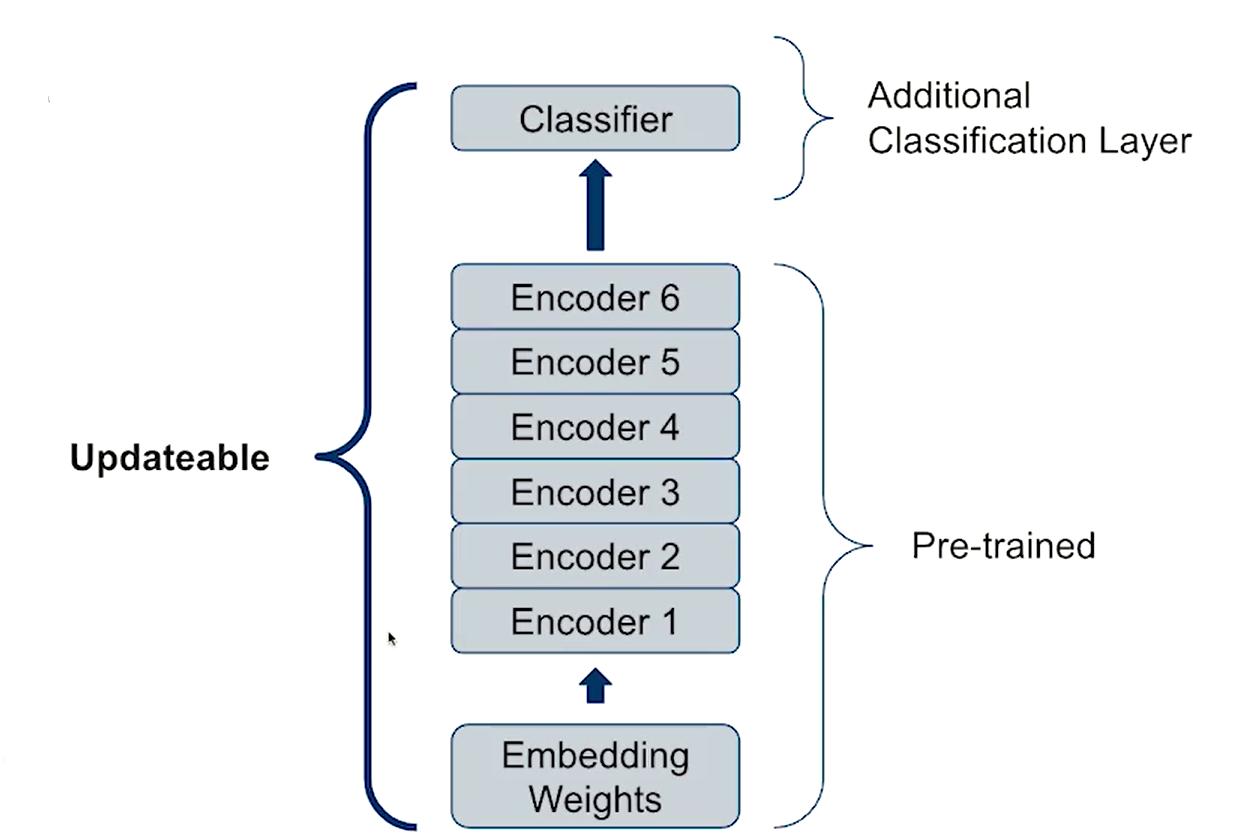

2. Freeze a subset of the model
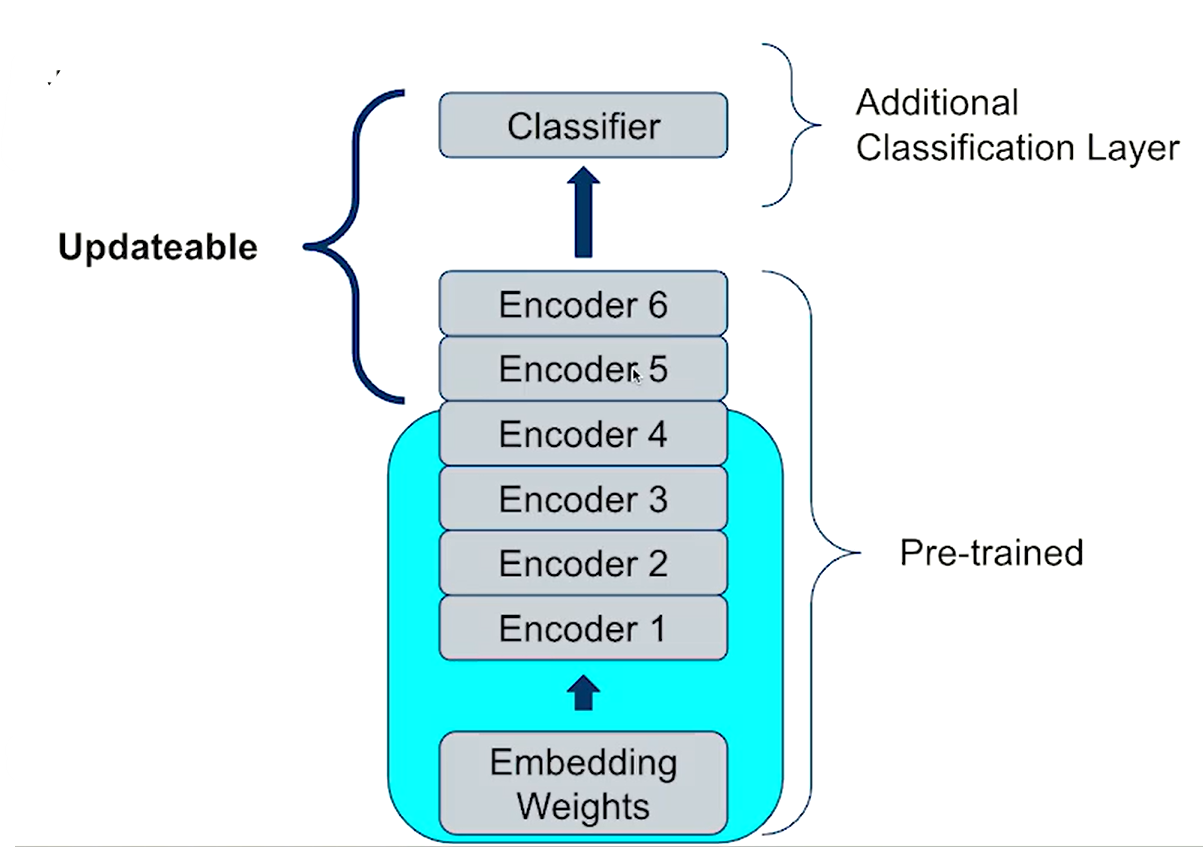

3. Freeze the whole model and only train the additional layers added on top

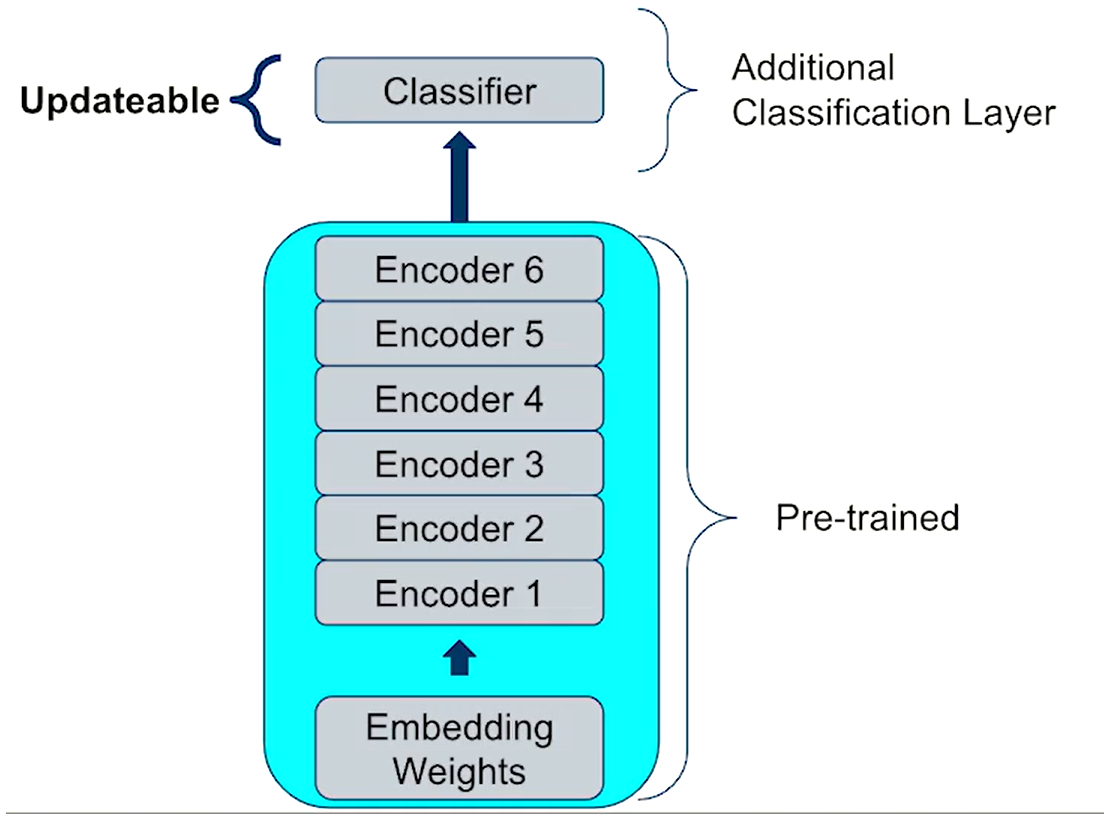

Finetuning with `HuggingFace's Trainer`

Provides a higher-level interface that encapsulates many of the complexities involved in the training loop, making it more convenient for users to train models 

Dataset - Holds all data and splits into training/testing sets
DataCollator - Forms batches of data from Datasets
TrainingArguments - Keeps track of training arguments like saving
strategy and learning rate scheduler parameters
Trainer - API to the Pytorch training loop for most standard cases

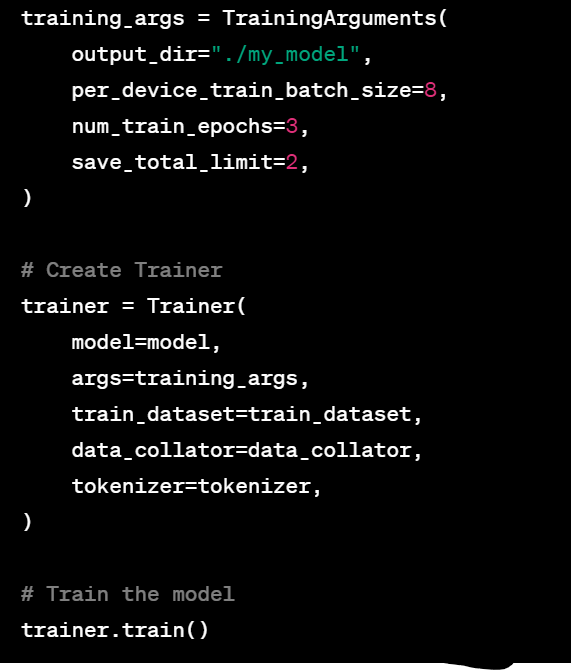

Bi-directional Encoder Representation from Transformers (BERT)

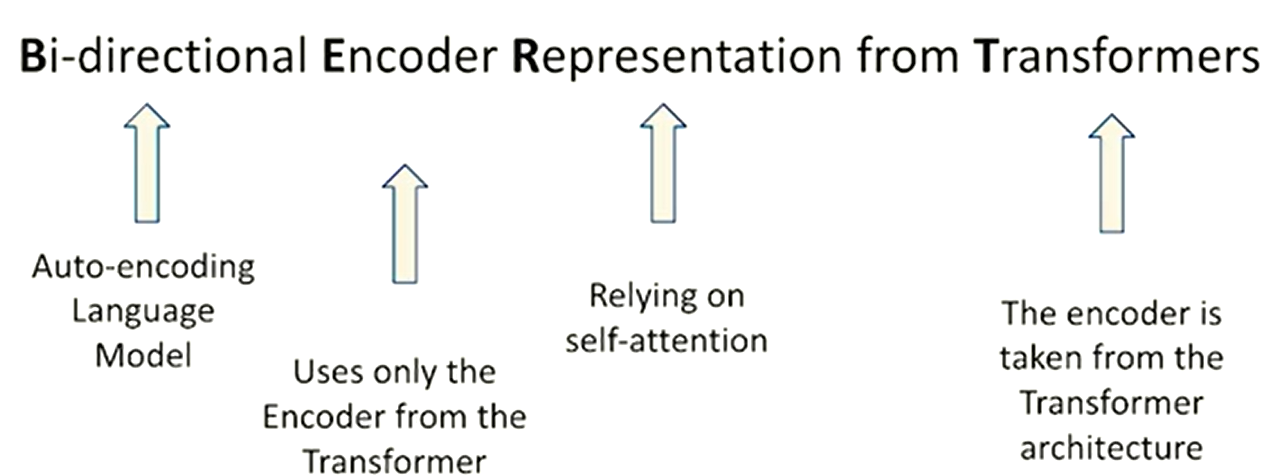

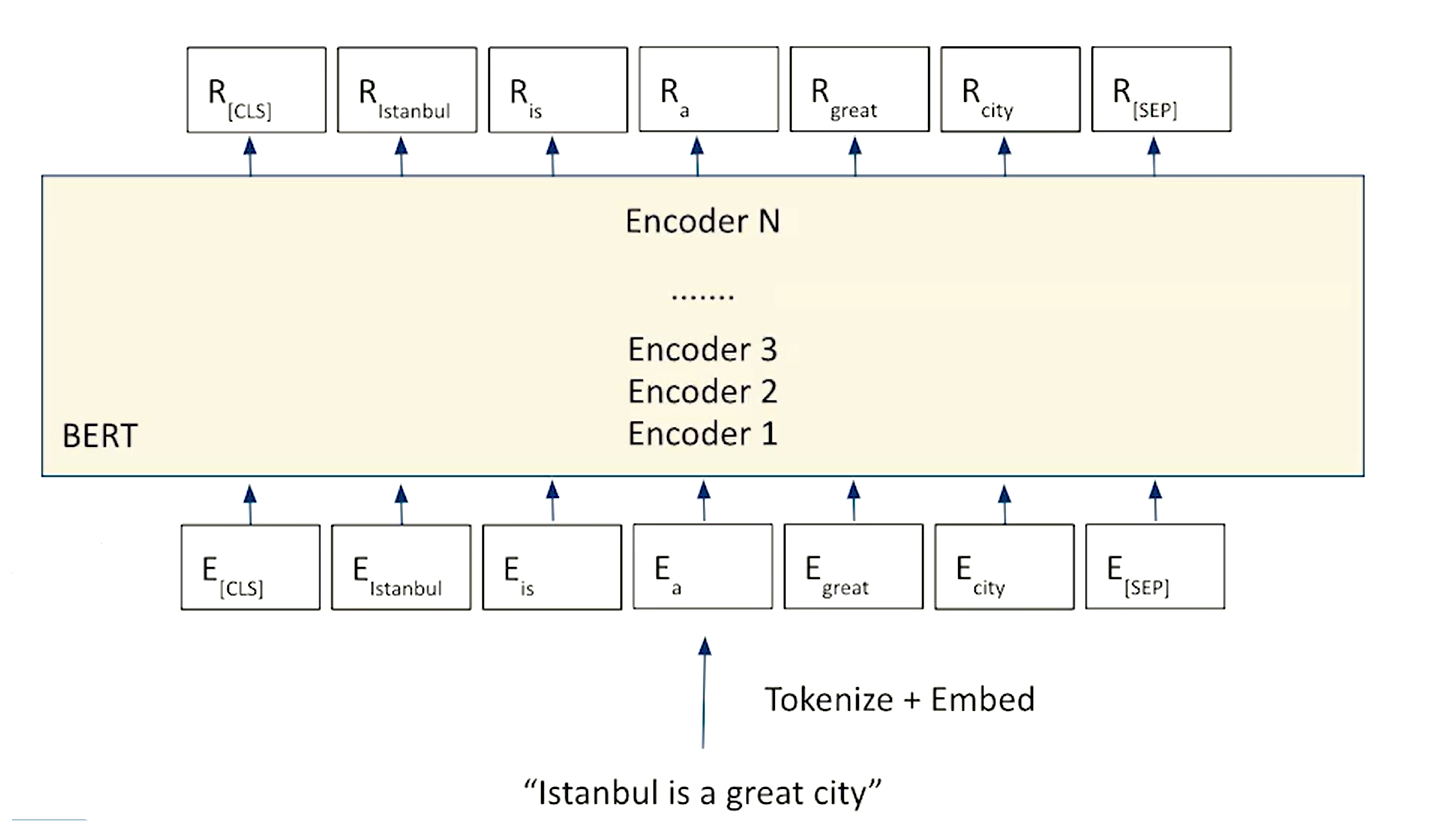

The [CLS] ("classification")  token is used to represent the entire input in one vector, can be used for classification tasks, Sentiment Analysis.

The [SEP] ("separator") token respresent a speration between two sequences

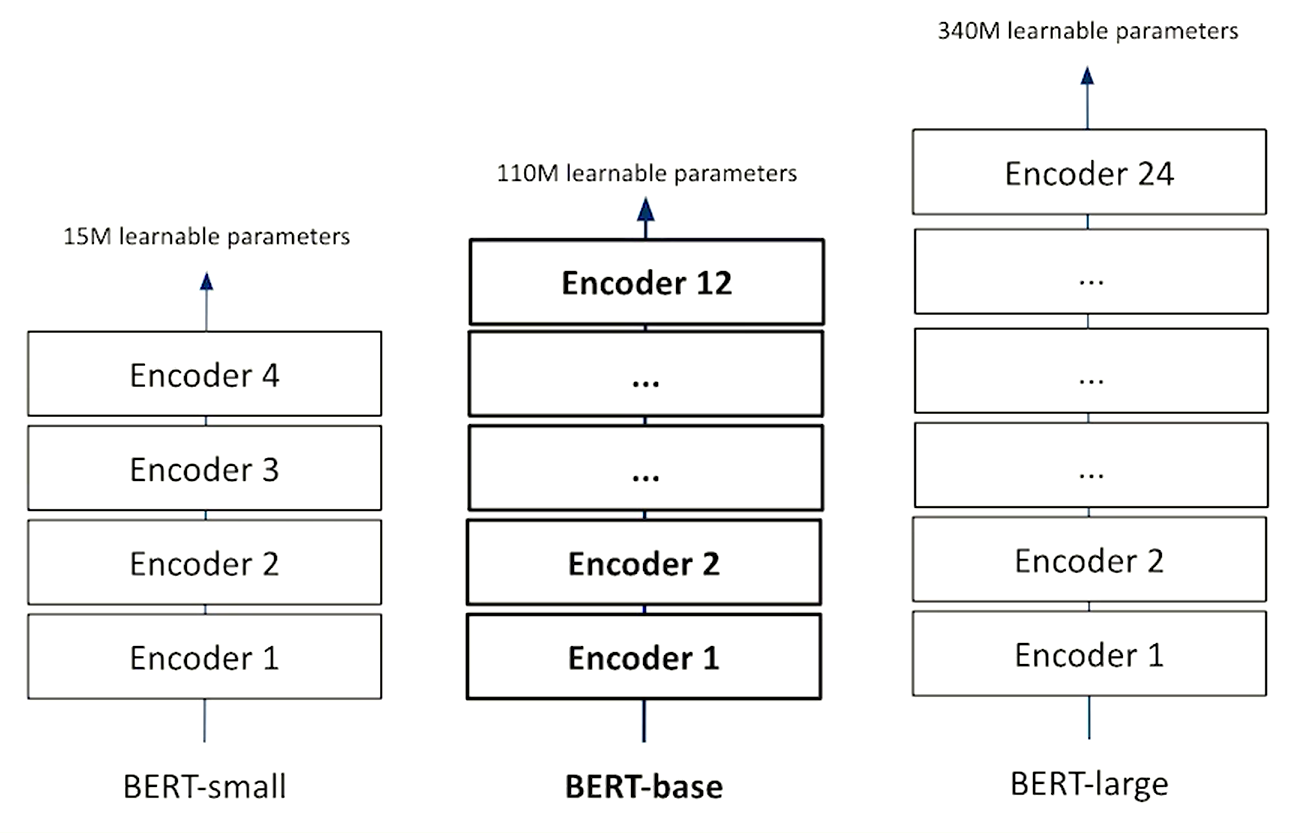

In [19]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [27]:
named_params = list(model.named_parameters())

print('The BERT model has {} different named parameters.\n'.format(len(named_params)))

# 30522 vocabulary terms each with a dimension of 768 

The BERT model has 199 different named parameters.



In [31]:
print("Embedding Layer\n")
for p in named_params[0:5]:
    print("{:<55} {:>12}".format(p[0],str(tuple(p[1].size()))))
    
print("\nFirst Encoder\n")
for p in named_params[5:21]:
    print("{:<55} {:>12}".format(p[0],str(tuple(p[1].size()))))    
    
print("\nOutput Layer\n")
for p in named_params[-2:]:
    print("{:<55} {:>12}".format(p[0],str(tuple(p[1].size()))))    

Embedding Layer

embeddings.word_embeddings.weight                       (30522, 768)
embeddings.position_embeddings.weight                     (512, 768)
embeddings.token_type_embeddings.weight                     (2, 768)
embeddings.LayerNorm.weight                                   (768,)
embeddings.LayerNorm.bias                                     (768,)

First Encoder

encoder.layer.0.attention.self.query.weight               (768, 768)
encoder.layer.0.attention.self.query.bias                     (768,)
encoder.layer.0.attention.self.key.weight                 (768, 768)
encoder.layer.0.attention.self.key.bias                       (768,)
encoder.layer.0.attention.self.value.weight               (768, 768)
encoder.layer.0.attention.self.value.bias                     (768,)
encoder.layer.0.attention.output.dense.weight             (768, 768)
encoder.layer.0.attention.output.dense.bias                   (768,)
encoder.layer.0.attention.output.LayerNorm.weight             (768,)
e

The pooler is a separate linear and tanh activated layer that acts on the `[CLS] ` token 's representation

This pooled output is often used as a representation fbr the entire sentence.

Example of how the [CLS] token can be used during fine-tuning for NLP tasks like classification:

Assume outputs is the output from BERT for the entire input sequence
       
       pooled_output = outputs.pooler_output`

For a binary classification task
       
       classifier_output = classification_layer(pooled_output)

In [32]:
tokenizer = BertTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [35]:
text = "Agney really loves Pokemon, Lucario is his favorite."
tokenizer.encode(text)

# 102 -> [CLS] and 102 -> [SEP]

[101, 12943, 5420, 7459, 20421, 102]

In [36]:
# Pass a sample text through BERT model
response = model(torch.tensor(tokenizer.encode(text)).unsqueeze(0))

In [37]:
response

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.4610,  0.0386, -0.0475,  ..., -0.0354,  0.5843,  0.2153],
         [-0.3515, -0.4301,  1.0822,  ..., -0.4654,  0.1369,  0.1690],
         [-0.7530, -0.2965,  0.0595,  ..., -0.5320,  0.2695, -0.3940],
         [ 0.6903,  0.4261,  0.4265,  ...,  0.2218,  0.6973, -0.1172],
         [-0.1252, -0.5701, -0.4699,  ...,  0.3901,  0.6424, -0.2264],
         [ 0.7551, -0.1806, -0.3154,  ...,  0.2346, -0.6774, -0.3297]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-8.5915e-01, -5.7720e-01, -8.8789e-01,  7.8857e-01,  7.3118e-01,
         -2.3990e-01,  9.1075e-01,  4.8456e-01, -7.1365e-01, -9.9999e-01,
         -5.8878e-01,  8.9429e-01,  9.8938e-01,  4.1844e-01,  9.0363e-01,
         -7.7058e-01, -3.7092e-01, -7.0016e-01,  5.4516e-01, -5.3321e-01,
          8.1753e-01,  9.9999e-01, -5.9314e-02,  3.9932e-01,  6.0751e-01,
          9.8310e-01, -8.8356e-01,  9.1540e-01,  9.4712e-01,  7.5509e-01,
       

In [39]:
response.last_hidden_state

tensor([[[-0.4610,  0.0386, -0.0475,  ..., -0.0354,  0.5843,  0.2153],
         [-0.3515, -0.4301,  1.0822,  ..., -0.4654,  0.1369,  0.1690],
         [-0.7530, -0.2965,  0.0595,  ..., -0.5320,  0.2695, -0.3940],
         [ 0.6903,  0.4261,  0.4265,  ...,  0.2218,  0.6973, -0.1172],
         [-0.1252, -0.5701, -0.4699,  ...,  0.3901,  0.6424, -0.2264],
         [ 0.7551, -0.1806, -0.3154,  ...,  0.2346, -0.6774, -0.3297]]],
       grad_fn=<NativeLayerNormBackward0>)

In [44]:
# The pooler output
print(response.pooler_output)
print(response.pooler_output.shape)
model.pooler

tensor([[-8.5915e-01, -5.7720e-01, -8.8789e-01,  7.8857e-01,  7.3118e-01,
         -2.3990e-01,  9.1075e-01,  4.8456e-01, -7.1365e-01, -9.9999e-01,
         -5.8878e-01,  8.9429e-01,  9.8938e-01,  4.1844e-01,  9.0363e-01,
         -7.7058e-01, -3.7092e-01, -7.0016e-01,  5.4516e-01, -5.3321e-01,
          8.1753e-01,  9.9999e-01, -5.9314e-02,  3.9932e-01,  6.0751e-01,
          9.8310e-01, -8.8356e-01,  9.1540e-01,  9.4712e-01,  7.5509e-01,
         -6.3575e-01,  3.6704e-01, -9.9376e-01, -2.9554e-01, -9.4123e-01,
         -9.9643e-01,  6.0210e-01, -7.6052e-01,  9.2123e-03, -1.2988e-01,
         -8.8854e-01,  5.2926e-01,  9.9999e-01, -1.0457e-02,  4.7660e-01,
         -3.8155e-01, -1.0000e+00,  3.3741e-01, -9.0030e-01,  8.1940e-01,
          7.7540e-01,  7.3036e-01,  1.7571e-01,  5.1628e-01,  5.5738e-01,
         -2.8111e-01,  9.1777e-02,  2.0617e-01, -3.4628e-01, -6.8838e-01,
         -6.5081e-01,  5.3280e-01, -8.0747e-01, -9.2509e-01,  8.4305e-01,
          7.0633e-01, -3.8150e-01, -4.

BertPooler(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (activation): Tanh()
)

In [42]:
# grab the final encoder's representation of the CLS token / Getting only the pooler output
CLS_embedding = response.last_hidden_state[:,0,:]

print(CLS_embedding.shape)

CLS_embedding = CLS_embedding.unsqueeze(0)
print(CLS_embedding.shape)

torch.Size([1, 768])
torch.Size([1, 1, 768])


In [43]:
model.pooler(CLS_embedding).shape

torch.Size([1, 768])

In [45]:
(model.pooler(CLS_embedding) == response.pooler_output).all()

tensor(True)

In [49]:
total_params = 0
for i in model.parameters():
    if len(i.shape) == 2:
        total_params += i.shape[0] * i.shape[1]
        
print (f' Total Parameters: {total_params:,} ' )        

 Total Parameters: 109,360,128 
